# The Project #

Take a [ZIP file] of images and process them, using a library built into python. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file contain newspaper images . Task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return images of all of the faces which were located on the newspaper page which mentions "pizza". This project will test ability to use OpenCV to detect faces, ability to use tesseract to do optical character recognition, and also to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip]. These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large.


## Importing Necessary Python Libraries

In [24]:
import zipfile
import os
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
#import sys

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('F:\Opencv XML files\haarcascade_frontalface_alt2.xml')


## Unzipping Images to a folder 

In [25]:

local_zip_test = "F:\Working folder\Spyder\Newspaper article\Images.zip"

zip_ref1 = zipfile.ZipFile(local_zip_test,'r')

zip_ref1.extractall('F:\Working folder\Spyder\Newspaper article\Data')

zip_ref1.close()



In [26]:
list_images = os.listdir(r'F:\Working folder\Spyder\Newspaper article\Data')
list_images

['a-0.png',
 'a-1.png',
 'a-10.png',
 'a-11.png',
 'a-12.png',
 'a-13.png',
 'a-2.png',
 'a-3.png',
 'a-4.png',
 'a-5.png',
 'a-6.png',
 'a-7.png',
 'a-8.png',
 'a-9.png']

In [27]:
find_word = input("Enter a word which needs to be searched ")

Enter a word which needs to be searched students


## Check Function
Below function checks whether the entered word is present in the page of newspaper.
If it is present then return 1 else 0

In [28]:
def check(word,img):
    img=Image.open(os.path.join(r'F:\Working folder\Spyder\Newspaper article\Data',img))
    text = pytesseract.image_to_string(img,lang='eng') 
    string = "".join(text)
    text = list(string.split(" "))
    for i in text:
        if (i == word):  
            return 1
    return 0
             


If returned value from the function is 1 i.e if the word is present in the page then this module prints all the images from that page. If the value is 0 then it displays a message that the word is not present in the page and continues with checking next page.
This process continues till all the images are not completed.

These images are for page 1
Word does not exist on this page
These images are for page 2


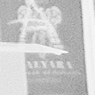

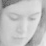

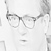

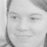

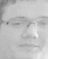

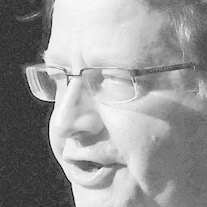

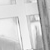

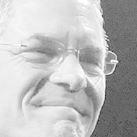

These images are for page 3


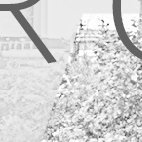

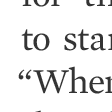

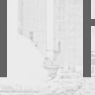

These images are for page 4
No images found on this page
These images are for page 5
Word does not exist on this page
These images are for page 6
Word does not exist on this page
These images are for page 7


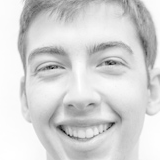

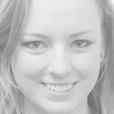

These images are for page 8


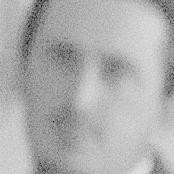

These images are for page 9


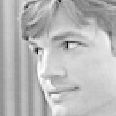

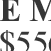

These images are for page 10
Word does not exist on this page
These images are for page 11
Word does not exist on this page
These images are for page 12
Word does not exist on this page
These images are for page 13
Word does not exist on this page
These images are for page 14
Word does not exist on this page


In [29]:
count=1
for img in list_images:
    print("These images are for page %d" % count)
    a=check(find_word,img)
    if a==1:
        image=cv.imread(os.path.join(r'F:\Working folder\Spyder\Newspaper article\Data',img))
        gray_img = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray_img)
        gray_img = Image.fromarray(gray_img)
        if len(faces)==0:
            print("No images found on this page")
        else:
            for x,y,w,h in faces:
                crop_img= gray_img.crop((x,y,x+w,y+h))
                display(crop_img)
    elif a==0:
        print("Word does not exist on this page")
        
    count+=1        
   

In [31]:

cv.destroyAllWindows()
